# Notebook Data Exploration

## Importation des packages et des données

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\ouedr\Desktop\Machine_Learning_Engineer\Projet5VF_Catégorisez_automatiquement_des_questions\Deploiement_FastAPI\Input\QueryResults.csv")

df

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,Minification failed. Returning unminified cont...,<p>I have made my first website using MVC 5 wh...,|asp.net|asp.net-mvc|bundling-and-minification|,24395412,40,49177,0.0,12
1,Where should ajax request be made in Flux app?,<p>I'm creating a react.js application with fl...,|javascript|reactjs|reactjs-flux|,26632415,199,40698,0.0,6
2,Gem Install Debugger Error,<p>I am running Rails v4.0.2 on Mac OS 10.9.2 ...,|ruby-on-rails|ruby|rubygems|rvm|,24395453,25,28278,0.0,6
3,How to Change body parser limit in Firebase?,<p>I'm trying to proxy a file upload to fireba...,|node.js|express|firebase|google-cloud-functio...,45489810,7,946,NaN,1
4,iOS Android Material Design Hierarchical Timin...,<p>I want to do the animation introduced by An...,|ios|uicollectionview|calayer|material-design|,26632893,11,895,0.0,3
...,...,...,...,...,...,...,...,...
49995,Make a Toolbar have a grid layout,<p>I want to make a <code>QToolBar</code> have...,|c++|qt|qt5|,23638595,7,2137,NaN,1
49996,Using @JmsListener with multiple payload types...,<p>I can write instances of multiple types to ...,|java|spring|jms|spring-jms|,42656519,6,6453,0.0,3
49997,"Angular2, testing and resolved data: How to te...","<p>I'm working through the <a href=""https://an...",|javascript|angular|jasmine|karma-runner|resol...,42656045,34,67797,0.0,2
49998,Unit Test Project can't reference MVC project,<p>Perhaps this is easier if you let Visual St...,|unit-testing|visual-studio-2013|asp.net-mvc-5|,23638602,10,7610,0.0,4


## Informations générales sur les données

In [ ]:
df.shape

(50000, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          50000 non-null  object 
 1   Body           50000 non-null  object 
 2   Tags           50000 non-null  object 
 3   Id             50000 non-null  int64  
 4   Score          50000 non-null  int64  
 5   ViewCount      50000 non-null  int64  
 6   FavoriteCount  42355 non-null  float64
 7   AnswerCount    50000 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 3.1+ MB


In [ ]:
df.nunique()

Title            50000
Body             50000
Tags             39393
Id               50000
Score              805
ViewCount        30183
FavoriteCount        3
AnswerCount         80
dtype: int64

In [ ]:
df.isnull().sum()

Title               0
Body                0
Tags                0
Id                  0
Score               0
ViewCount           0
FavoriteCount    7645
AnswerCount         0
dtype: int64

In [ ]:
df.duplicated(subset=['Title', 'Body', 'Tags']).sum()

0

## Description de la base de données

In [ ]:
df.describe(include=object)

,Title,Body,Tags
count,50000,50000,50000
unique,50000,50000,39393
top,Minification failed. Returning unminified cont...,<p>I have made my first website using MVC 5 wh...,|javascript|
freq,1,1,180


In [ ]:
df.describe(include=np.number)

,Id,Score,ViewCount,FavoriteCount,AnswerCount
count,5.000000e+04,50000.000000,5.000000e+04,42355.000000,50000.000000
mean,2.392697e+07,35.912840,3.960468e+04,0.005336,4.340360
std,1.908143e+07,169.205425,1.371497e+05,1.093288,5.143497
min,4.000000e+00,6.000000,3.000000e+01,0.000000,1.000000
25%,6.545710e+05,7.000000,4.103750e+03,0.000000,2.000000
50%,2.113953e+07,11.000000,1.111500e+04,0.000000,3.000000
75%,4.012100e+07,22.000000,2.982225e+04,0.000000,5.000000
max,6.601719e+07,11317.000000,6.047409e+06,225.000000,296.000000


In [ ]:
result = df[['Title', 'Body', 'Tags']].applymap(lambda x: len(str(x)))
print(result)

       Title  Body  Tags
0         50  2812    47
1         46   209    33
2         26  5523    33
3         44  2699    61
4         70   431    46
...      ...   ...   ...
49995     33   595    12
49996     72  1469    28
49997     58  1492    50
49998     45   594    47
49999     56   634    20

[50000 rows x 3 columns]


C:\Users\ouedr\AppData\Local\Temp\ipykernel_2788\505973981.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  result = df[['Title', 'Body', 'Tags']].applymap(lambda x: len(str(x)))


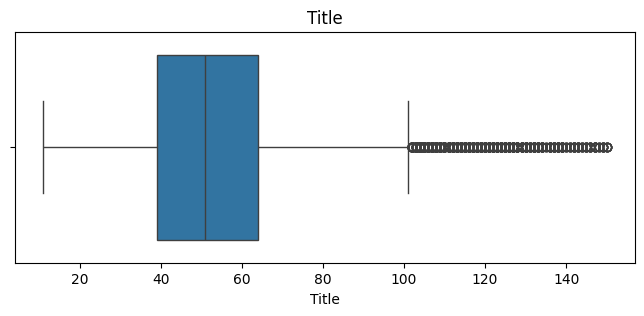

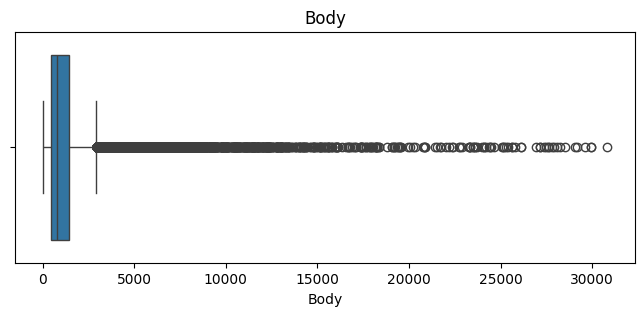

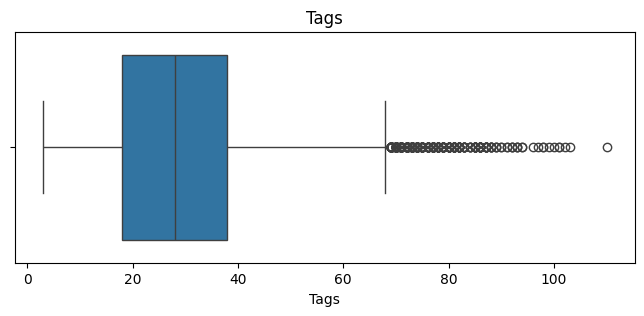

In [ ]:
for column in result.columns:
    fig, ax = plt.subplots(figsize=(8, 3))
    sns.boxplot(x=result[column], ax=ax)
    plt.title(column)
    plt.show()

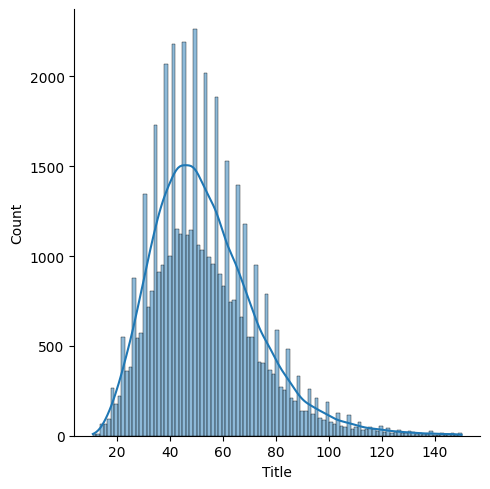

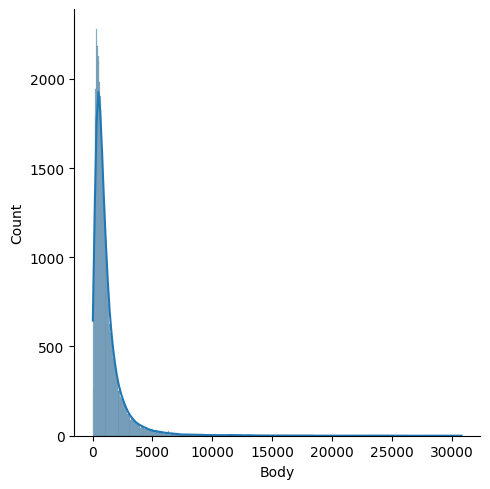

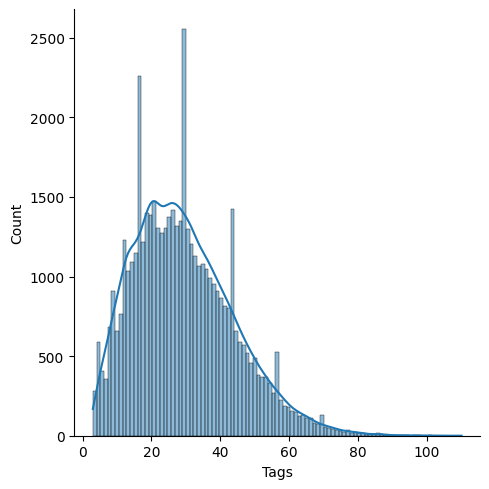

In [ ]:
for col in result:
    sns.displot(result[col], kde=True)
    plt.show()

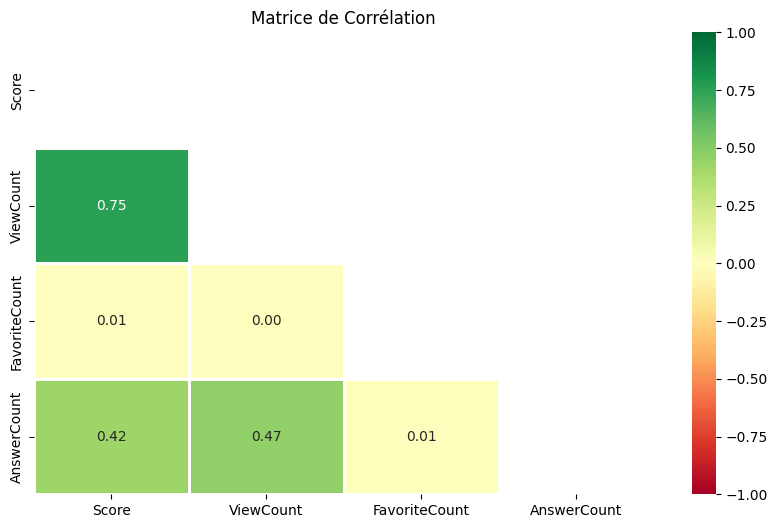

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Calculer la matrice de corrélation
correlation_matrix = df[numeric_cols].drop('Id', axis=1).corr()

# Afficher la heatmap de la matrice de corrélation
plt.figure(figsize=(10, 6))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, center=0, cmap='RdYlGn',
            linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Matrice de Corrélation')
plt.show()

## Text Processing (nettoyage et data feature engineering)

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from PIL import Image

In [ ]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from wordcloud import WordCloud

In [ ]:
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ouedr\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ouedr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ouedr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ouedr\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ouedr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ouedr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[n

True

### Nettoyage des balises HTML dans la colonne 'Body'

### Création d'une fonction pour le text processing

In [ ]:
def clean_text(text,
               rejoin=False,
               list_rare_words=None,
               min_len_word=3,
               force_is_alpha=True,
               eng_worsd=None):
    if not list_rare_words:
      list_rare_words = []
      
    # Supprimer les balises HTML
    text = BeautifulSoup(text, "html.parser").get_text()
    
    # Convertir en minuscules
    text = text.lower().strip()
    
    # Tokenisation
    tokenizer = RegexpTokenizer(r"\w+")
    tokens = tokenizer.tokenize(text)
    
    # Supprimer les stopwords
  
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    #
    non_rare_tokens = [w for w in filtered_tokens if w not in list_rare_words]
    #
    more_than_N = [w for w in non_rare_tokens if len(w) >=min_len_word]
    #
    if force_is_alpha:
      alpha_tokens= [w for w in more_than_N if w.isalpha()]
      
    # Lemmatisation
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in alpha_tokens]
    
    # Rejoindre les tokens en texte
    cleaned_text = ' '.join(lemmatized_tokens)
    return cleaned_text

### Application de la focntion aux colonnes concernées

In [ ]:
df['Title'] = df['Title'].apply(clean_text)
df['Body'] = df['Body'].apply(clean_text)

C:\Users\ouedr\AppData\Local\Temp\ipykernel_2788\2814308451.py:10: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


In [ ]:
df.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,minification failed returning unminified content,made first website using mvc work fine local m...,|asp.net|asp.net-mvc|bundling-and-minification|,24395412,40,49177,0.0,12
1,ajax request made flux app,creating react application flux architecture t...,|javascript|reactjs|reactjs-flux|,26632415,199,40698,0.0,6
2,gem install debugger error,running rail mac everything smoothly sudden ge...,|ruby-on-rails|ruby|rubygems|rvm|,24395453,25,28278,0.0,6
3,change body parser limit firebase,trying proxy file upload firebase cloud functi...,|node.js|express|firebase|google-cloud-functio...,45489810,7,946,NaN,1
4,io android material design hierarchical timing...,want animation introduced android material des...,|ios|uicollectionview|calayer|material-design|,26632893,11,895,0.0,3


### Visualisation avec Wordcloud

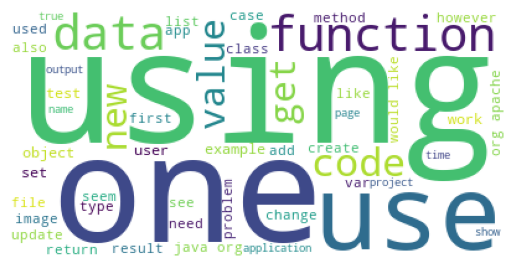

In [23]:
wordcloud = WordCloud(background_color='white',
                      stopwords= [],
                      max_words=50).generate(" ".join(df['Body']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

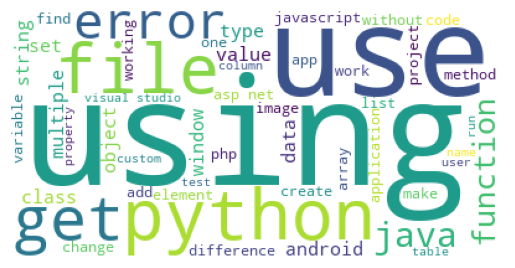

In [24]:
wordcloud = WordCloud(background_color='white',
                      stopwords= [],
                      max_words=50).generate(" ".join(df['Title']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();